In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# function to integrate with the Euler method
def Euler_integrate(x, dt, func, args):
    return x + func(x, args) * dt

# 
def dy(y, args):
    x = args[0]
    Lambda = args[1]
    R = args[2]
    return 1 - y - (y/Lambda) * np.abs(-y + R*x)

def dx(x, args):
    y = args[0]
    Lambda = args[1]
    R = args[2]
    Delta = args[3]
    return Delta * (1 - x) - (x/Lambda) * np.abs(-y + R*x)

In [53]:
# parameters related to the model
R = 2
Lambda = 1/5
Delta = 1/6 # 1
print(start_x.shape)

print(int((start_x.shape[0] - 2)/2))

(22,)
10


In [63]:
# create trajectories with different starting points
interval = 0.01 # now get 40 different trajectories

start_x = np.arange(0, 1 + interval, interval) 
start_y = np.zeros(start_x.shape)
start_x = np.concatenate((start_x, start_x))
start_y = np.concatenate((start_y, np.ones(start_y.shape), np.arange(interval, 1, interval), np.arange(interval, 1, interval)))
start_x = np.concatenate((start_x, np.zeros(int((start_x.shape[0] - 4)/2)), np.ones(int((start_x.shape[0] - 4)/2))))
print(start_x, len(start_x))
print(start_y, len(start_y))

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1
 0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24
 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38
 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52
 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66
 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8
 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94
 0.95 0.

In [64]:
x = []
y = []

n_timesteps = 5000
dt = 0.01


for ind_traj in range(len(start_x)):
    x_1 = [None] * n_timesteps
    y_1 = [None] * n_timesteps
    
    x_1[0] = start_x[ind_traj]
    y_1[0] = start_y[ind_traj]
    
    for t in range(1, n_timesteps):
        x_tmp = x_1[t-1]
        y_tmp = y_1[t-1]

        args_x = (y_tmp, Lambda, R, Delta)
        args_y = (x_tmp, Lambda, R)
        x_1[t] = Euler_integrate(x_tmp, dt, dx, args_x)
        y_1[t] = Euler_integrate(y_tmp, dt, dy, args_y)
    
    x.append(x_1)
    y.append(y_1)
    
    
print(len(x))
print(len(y))


400
400


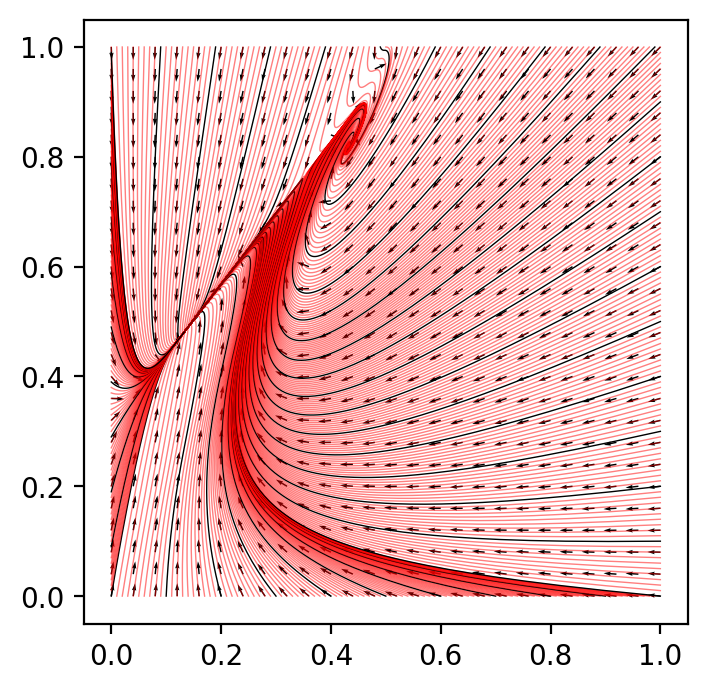

In [75]:
# for the direction field
nx, ny = 0.04, 0.04
x_g = np.arange(0, 1+nx, nx)
y_g = np.arange(0, 1+nx, ny)
X, Y  = np.meshgrid(x_g, y_g)

dy_g = 1 - Y - (Y/Lambda) * np.abs(-Y + R*X)
dx_g = Delta * (1 - X) - (X/Lambda) * np.abs(-Y + R*X)
dyu_g = dy_g/np.sqrt(dx_g**2 + dy_g**2)
dxu_g = dx_g/np.sqrt(dx_g**2 + dy_g**2)

plt.figure(dpi = 200)
for ind in range(len(x)):
    if ind % 10 == 0:
        plt.plot(x[ind], y[ind], linewidth = 0.5, c = 'black', alpha = 1)
    else:
        plt.plot(x[ind], y[ind], linewidth = 0.5, c = 'r', alpha = 0.5)
plt.quiver(X, Y, dxu_g, dyu_g, color = 'k')

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()


In [36]:
n_timesteps = 5000
dt = 0.01

x_1 = [None] * n_timesteps
y_1 = [None] * n_timesteps

# init
x_1[0] = 0.7
y_1[0] = 1

for t in range(1, n_timesteps):
#     print(t)
    x_tmp = x_1[t-1]
    y_tmp = y_1[t-1]
    
    args_x = (y_tmp, Lambda, R, Delta)
    args_y = (x_tmp, Lambda, R)
    x_1[t] = Euler_integrate(x_tmp, dt, dx, args_x)
    y_1[t] = Euler_integrate(y_tmp, dt, dy, args_y)

In [38]:
n_timesteps = 5000
dt = 0.01
x_2 = [None] * n_timesteps
y_2 = [None] * n_timesteps

# init
x_2[0] = 1
y_2[0] = 0.5

for t in range(1, n_timesteps):
#     print(t)
    x_tmp = x_2[t-1]
    y_tmp = y_2[t-1]
    
    args_x = (y_tmp, Lambda, R, Delta)
    args_y = (x_tmp, Lambda, R)
    x_2[t] = Euler_integrate(x_tmp, dt, dx, args_x)
    y_2[t] = Euler_integrate(y_tmp, dt, dy, args_y)

In [41]:
n_timesteps = 5000
dt = 0.01
x_3 = [None] * n_timesteps
y_3 = [None] * n_timesteps

# init
x_3[0] = 0.1
y_3[0] = 0

for t in range(1, n_timesteps):
#     print(t)
    x_tmp = x_3[t-1]
    y_tmp = y_3[t-1]
    
    args_x = (y_tmp, Lambda, R, Delta)
    args_y = (x_tmp, Lambda, R)
    x_3[t] = Euler_integrate(x_tmp, dt, dx, args_x)
    y_3[t] = Euler_integrate(y_tmp, dt, dy, args_y)

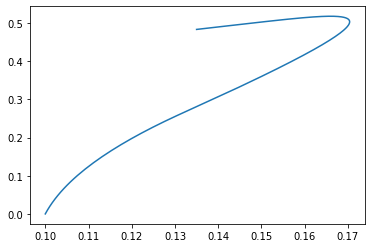

In [42]:
plt.figure()
plt.plot(x_3, y_3)
plt.show()

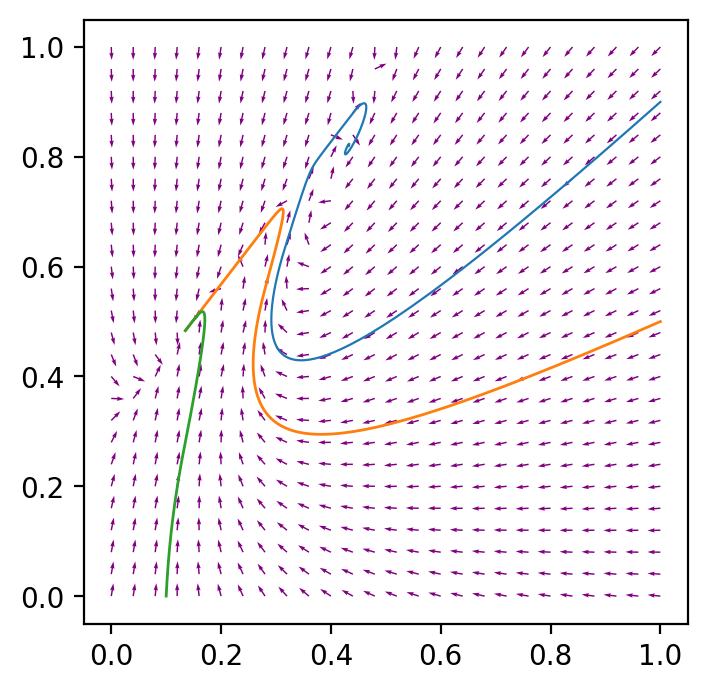

In [58]:
nx, ny = 0.04, 0.04
x_g = np.arange(0, 1+nx, nx)
y_g = np.arange(0, 1+nx, ny)
X, Y  = np.meshgrid(x_g, y_g)

dy_g = 1 - Y - (Y/Lambda) * np.abs(-Y + R*X)
dx_g = Delta * (1 - X) - (X/Lambda) * np.abs(-Y + R*X)
dyu_g = dy_g/np.sqrt(dx_g**2 + dy_g**2)
dxu_g = dx_g/np.sqrt(dx_g**2 + dy_g**2)


plt.figure(dpi = 200)
plt.quiver(X, Y, dxu_g, dyu_g, color = 'purple')
plt.plot(x_1, y_1, linewidth = 0.8)
plt.plot(x_2, y_2, linewidth = 0.8)
plt.plot(x_3, y_3, linewidth = 0.8)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()